In [2]:
# %matplotlib inline
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# nucleu parameter
I = 1/2
# gammaNb = 6.5674e7 # rad T-1 s-1
gammaH  = 26.7522128e7 # rad T-1 s-1

In [4]:
# external param
hplank2pi = 6.626e-34*np.pi*2.0
kBoltcman = 1.38e-23
B0 = 9 # T
T  = 5 # K
omega = gammaH*B0
d_omega = omega*1e-6 # why "-"?

# pulse parameter
tpulse   = 1e-3 # ms
tau      = 50e-3 # ms
B1       = np.pi*0.5/(gammaH*tpulse)
omega1   = np.pi*0.5/tpulse

In [5]:
ddomega1distrib=np.linspace(-2.0*d_omega, 2.0*d_omega, 50)

K       = hplank2pi*omega/(kBoltcman*T)
A       = np.exp(K)
ro0     = np.matrix([[1,0],[0,1]], dtype=complex)
ro0[0,0]=(1/A)/(A+1/A)
ro0[1,1]=A/(A+1/A) 

In [6]:
sigma_x = np.matrix([[0,1],
                     [1,0]])
sigma_y = np.matrix([[0,-1j],
                     [1j,0]])
sigma_z = np.matrix([[1,0],
                     [0,-1]])
sigma_E = np.matrix([[1,0],
                     [0,1]])

In [7]:
def Rz(t,omegaz):
    return np.cos(0.5*omegaz*t)*sigma_E+(1j)*np.sin(0.5*omegaz*t)*sigma_z
def Rx(t,omegax):
    return np.cos(0.5*omegax*t)*sigma_E+(1j)*np.sin(0.5*omegax*t)*sigma_x

In [8]:
# sequence pi/2 - tau - pi
N=1024
Tstart=tau*2 - 20e-3
Tfinish=40e-3+Tstart
t=np.linspace(Tstart, Tfinish, N)
Mx=np.zeros(N)
My=np.zeros(N)
Mz=np.zeros(N)

# pulse sequence
for k in range(50):
    d_omega1 = d_omega + ddomega1distrib[k]
    ditriK = np.exp(-ddomega1distrib[k]*ddomega1distrib[k]/2.0/d_omega/d_omega)
    
    # first pulse pi/2
    eHm1Ze = Rz(tpulse, d_omega1)
    eHm1RF  = Rx(tpulse, omega1)
    ro1 = eHm1RF*eHm1Ze*ro0*eHm1Ze.conjugate()*eHm1RF.conjugate()
    
    # evolution after first pulse
    eHm2Ze = Rz(tau - tpulse, d_omega1)
    ro2 = eHm2Ze*ro1*eHm2Ze.conjugate()
    
    # second pulse 
    eHm3Ze = Rz(2*tpulse, d_omega1)
    eHm3RF  = Rx(2*tpulse, omega1)
    ro3 = eHm3RF*eHm3Ze*ro2*eHm3Ze.conjugate()*eHm3RF.conjugate()
    
    # evolution after second pulse
    for i in range(N):
        eHm4Ze = Rz(t[i]- tpulse*2.0 - tau, d_omega1)
        ro = eHm4Ze*ro3*eHm4Ze.transpose().conjugate()
    
        MatX = ro*sigma_x
        MatY = ro*sigma_y
        MatZ = ro*sigma_z
        Mx[i]+= ((MatX).trace()).real*ditriK
        My[i]+= ((MatY).trace()).real*ditriK
        Mz[i]+= ((MatZ).trace()).real*ditriK

<IPython.core.display.Javascript object>


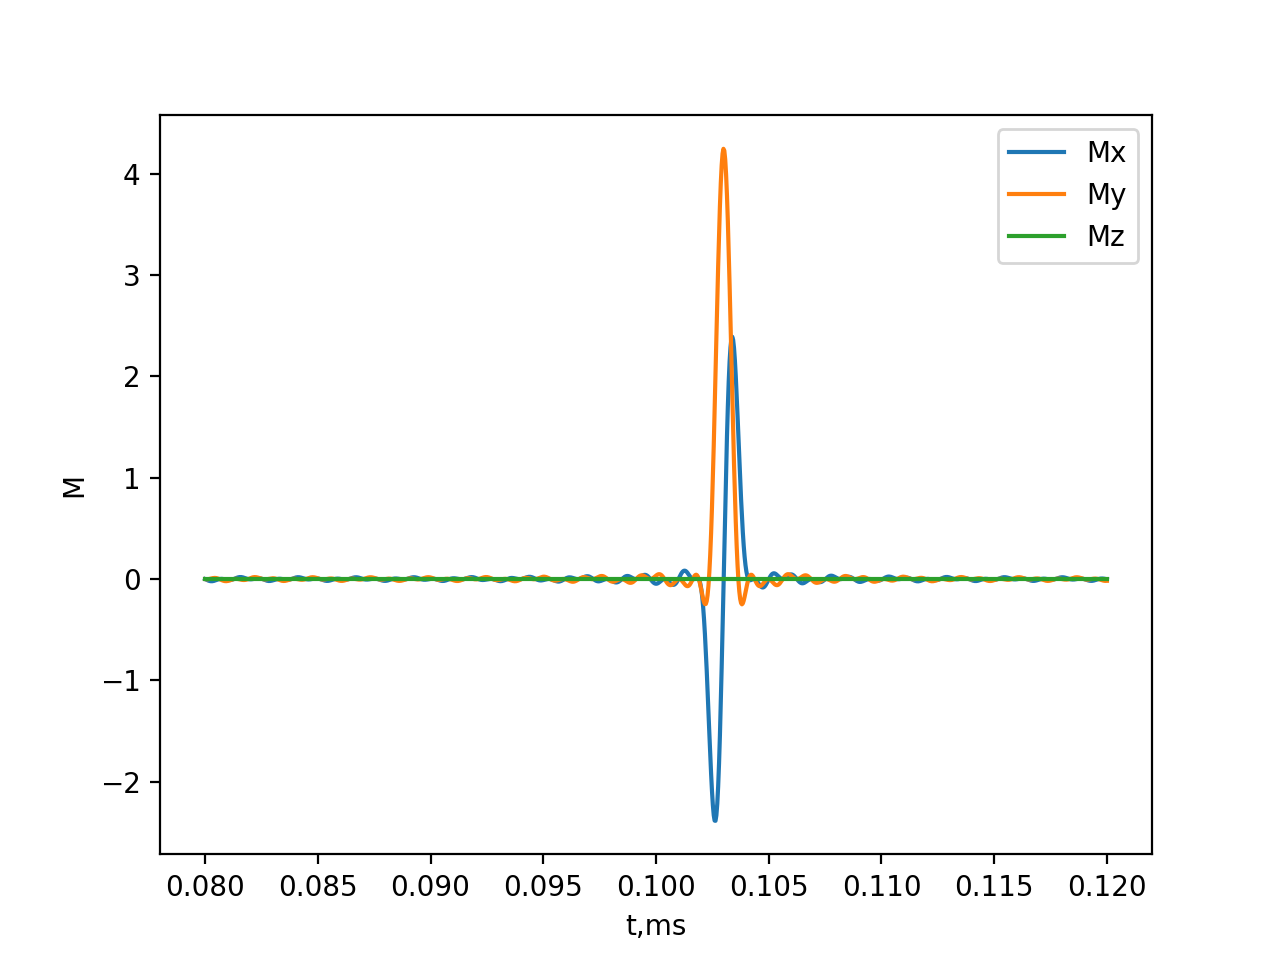

In [9]:
plt.figure()
plt.plot(t, Mx, label = 'Mx')
plt.plot(t, My, label = 'My')
plt.plot(t, Mz, label = 'Mz')
plt.ylabel("M")
plt.xlabel('t,ms')
plt.legend()

<IPython.core.display.Javascript object>


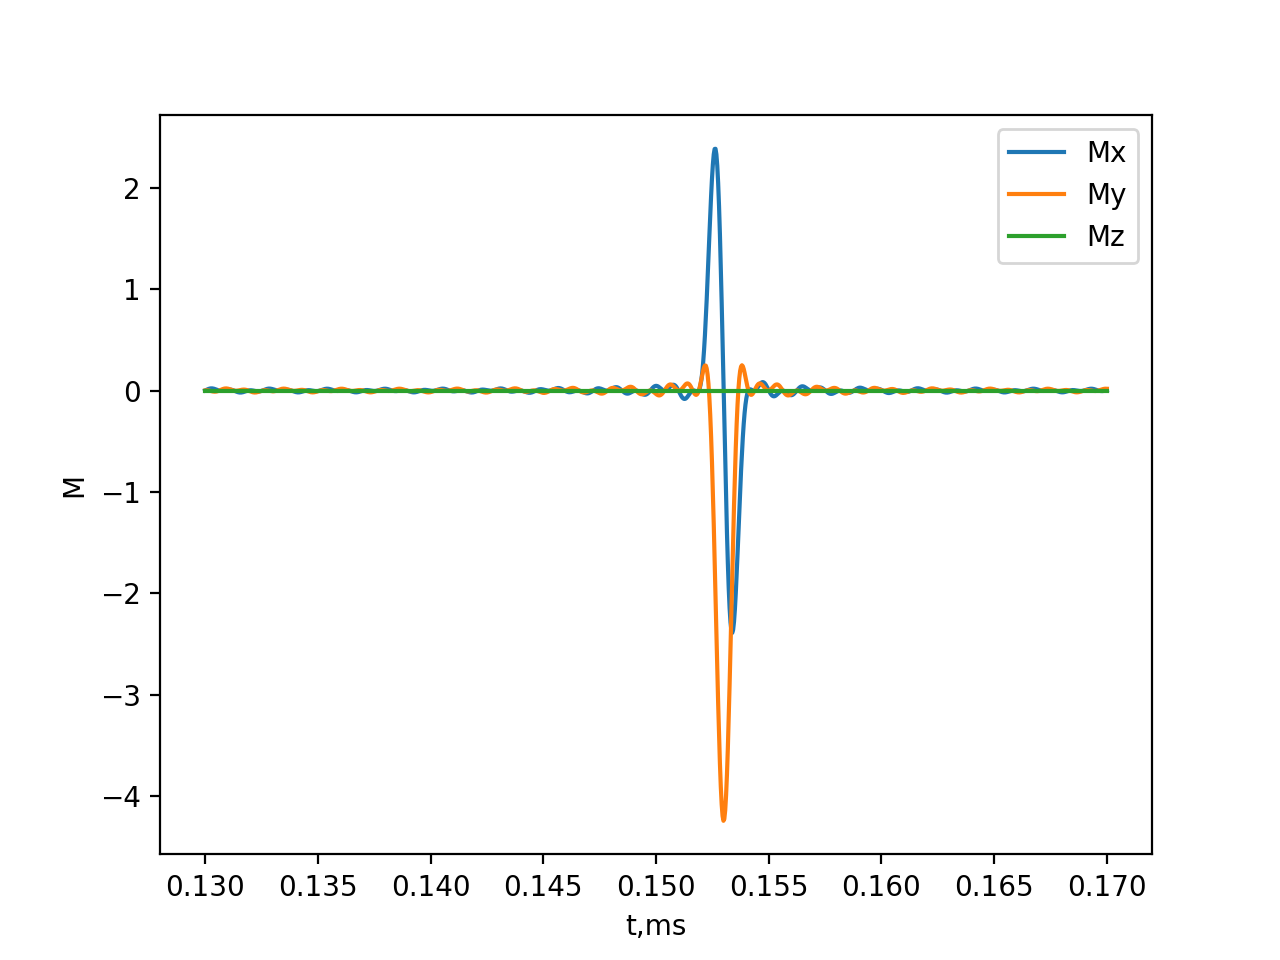

In [10]:
# sequence pi - Delay - pi/2 - tau - pi
N=1024
# Delay = np.linspace(20, 150, 10)
Delay = 50e-3

Mx=np.zeros(N)
My=np.zeros(N)
Mz=np.zeros(N)

Tstart= Delay + tau*2 - 20e-3
Tfinish=40e-3+Tstart
t=np.linspace(Tstart, Tfinish, N)

# pulse sequence
for k in range(50):
    d_omega1 = d_omega + ddomega1distrib[k]
    ditriK = np.exp(-ddomega1distrib[k]*ddomega1distrib[k]/2.0/d_omega/d_omega)

    #zero pulse pi
    eHm00Ze = Rz(2*tpulse, d_omega1)
    eHm00RF  = Rx(2*tpulse, omega1)
    ro00 = eHm00RF*eHm00Ze*ro0*eHm00Ze.conjugate()*eHm00RF.conjugate()

    #evolution after zero pulse
    eHm01Ze = Rz(Delay - 2*tpulse, d_omega1)
    ro01    = eHm01Ze*ro00*eHm01Ze.conjugate()

    # first pulse pi/2
    eHm1Ze = Rz(tpulse, d_omega1)
    eHm1RF  = Rx(tpulse, omega1)
    ro1 = eHm1RF*eHm1Ze*ro01*eHm1Ze.conjugate()*eHm1RF.conjugate()

    # evolution after first pulse
    eHm2Ze = Rz(tau - tpulse, d_omega1)
    ro2 = eHm2Ze*ro1*eHm2Ze.conjugate()

    # second pulse 
    eHm3Ze = Rz(2*tpulse, d_omega1)
    eHm3RF  = Rx(2*tpulse, omega1)
    ro3 = eHm3RF*eHm3Ze*ro2*eHm3Ze.conjugate()*eHm3RF.conjugate()

    # evolution after second pulse
    for i in range(N):
        eHm4Ze = Rz(t[i]- tpulse*2.0 - Delay - tau, d_omega1)
        ro = eHm4Ze*ro3*eHm4Ze.transpose().conjugate()

        MatX = ro*sigma_x
        MatY = ro*sigma_y
        MatZ = ro*sigma_z
        Mx[i]+= ((MatX).trace()).real*ditriK
        My[i]+= ((MatY).trace()).real*ditriK
        Mz[i]+= ((MatZ).trace()).real*ditriK

plt.figure()
plt.plot(t, Mx, label = 'Mx')
plt.plot(t, My, label = 'My')
plt.plot(t, Mz, label = 'Mz')
plt.ylabel("M")
plt.xlabel('t,ms')
plt.legend()

In [11]:
# sequence pi/2 - tau - pi
N=1024
Delay = 50e-3 # np.linspace(20e-3, 25e-3, 5)

Mx=np.zeros(N)
My=np.zeros(N)
Mz=np.zeros(N)

Tstart= Delay + tau*2 - 20e-3
Tfinish=40e-3+Tstart
t=np.linspace(Tstart, Tfinish, N)
    # pulse sequence
for k in range(50):
    d_omega1 = d_omega + ddomega1distrib[k]
    ditriK = np.exp(-ddomega1distrib[k]*ddomega1distrib[k]/2.0/d_omega/d_omega)

    #zero pulse pi
    eHm00Ze = Rz(2*tpulse, d_omega1)
    eHm00RF  = Rx(2*tpulse, omega1)
    ro00 = eHm00RF*eHm00Ze*ro0*eHm00Ze.conjugate()*eHm00RF.conjugate()

    #evolution after zero pulse
    eHm01Ze = Rz(Delay - 2*tpulse, d_omega1)
    ro01    = eHm01Ze*ro00*eHm01Ze.conjugate()

    # first pulse pi/2
    eHm1Ze = Rz(tpulse, d_omega1)
    eHm1RF  = Rx(tpulse, omega1)
    ro1 = eHm1RF*eHm1Ze*ro01*eHm1Ze.conjugate()*eHm1RF.conjugate()

    # evolution after first pulse
    eHm2Ze = Rz(tau - tpulse, d_omega1)
    ro2 = eHm2Ze*ro1*eHm2Ze.conjugate()

    # second pi/2 pulse 
    eHm3Ze = Rz(2*tpulse, d_omega1)
    eHm3RF  = Rx(2*tpulse, omega1)
    ro3 = eHm3RF*eHm3Ze*ro2*eHm3Ze.conjugate()*eHm3RF.conjugate()

    # evolution after second pulse
    for i in range(N):
        eHm4Ze = Rz(t[i]- tpulse*2.0 - Delay - tau, d_omega1)
        ro = eHm4Ze*ro3*eHm4Ze.transpose().conjugate()

        MatX = ro*sigma_x
        MatY = ro*sigma_y
        MatZ = ro*sigma_z
        Mx[i]+= ((MatX).trace()).real*ditriK
        My[i]+= ((MatY).trace()).real*ditriK
        Mz[i]+= ((MatZ).trace()).real*ditriK


<IPython.core.display.Javascript object>


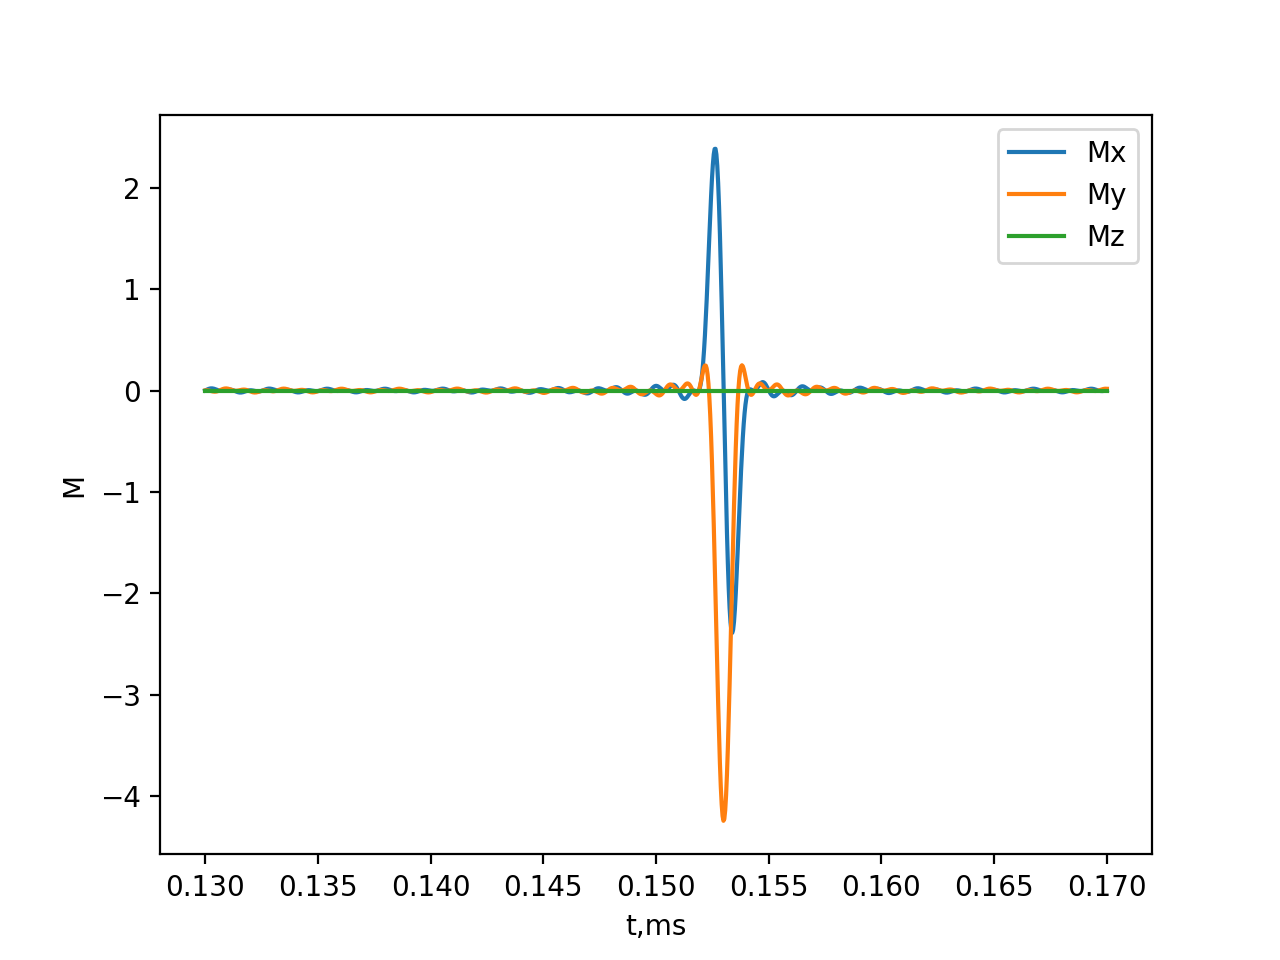

In [12]:
plt.figure()
plt.plot(t, Mx, label = 'Mx')
plt.plot(t, My, label = 'My')
plt.plot(t, Mz, label = 'Mz')
plt.ylabel("M")
plt.xlabel('t,ms')
plt.legend()

In [13]:
#for spin J = 9/2

In [15]:
# nucleu parameter
I = 9/2
gammaNb = 6.5674e7 # rad T-1 s-1

In [17]:
# external param
hplank2pi = 6.626e-34*np.pi*2.0
kBoltcman = 1.38e-23
B0 = 9 # T
T  = 5 # K
omega = gammaNb*B0
d_omega = omega*1e-6 # why "-"?

# pulse parameter
tpulse   = 1e-3 # ms
tau      = 50e-3 # ms
B1       = np.pi*0.5/(gammaNb*tpulse)
omega1   = np.pi*0.5/tpulse

In [26]:
ddomega1distrib=np.linspace(-2.0*d_omega, 2.0*d_omega, 50)

K       = hplank2pi*omega/(kBoltcman*T)
denominator = np.exp(4.5*K) + np.exp(-4.5*K) + np.exp(3.5*K) + np.exp(-3.5*K)+ np.exp(1.5*K) + np.exp(-1.5*K) +np.exp(0.5*K) + np.exp(-0.5*K)

ro0     = np.matrix(
             [[1,0,0,0,0,0,0,0,0,0],
              [0,1,0,0,0,0,0,0,0,0],
              [0,0,1,0,0,0,0,0,0,0],
              [0,0,0,1,0,0,0,0,0,0],
              [0,0,0,0,1,0,0,0,0,0],
              [0,0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,0,1,0,0,0],
              [0,0,0,0,0,0,0,1,0,0],
              [0,0,0,0,0,0,0,0,1,0],
              [0,0,0,0,0,0,0,0,0,1],
             ], dtype=complex)
ro0[0,0] = np.exp(-4.5*K)*denominator
ro0[1,1] = np.exp(-3.5*K)*denominator
ro0[2,2] = np.exp(-2.5*K)*denominator
ro0[3,3] = np.exp(-1.5*K)*denominator
ro0[4,4] = np.exp(-0.5*K)*denominator
ro0[5,5] = np.exp(0.5*K)*denominator
ro0[6,6] = np.exp(1.5*K)*denominator
ro0[7,7] = np.exp(2.5*K)*denominator
ro0[8,8] = np.exp(3.5*K)*denominator
ro0[9,9] = np.exp(4.5*K)*denominator

In [31]:
Sz = 0.5*np.matrix(
        [[9,0,0,0,0,0,0,0,0,0],
         [0,7,0,0,0,0,0,0,0,0],
         [0,0,5,0,0,0,0,0,0,0],
         [0,0,0,3,0,0,0,0,0,0],
         [0,0,0,0,1,0,0,0,0,0],
         [0,0,0,0,0,-1,0,0,0,0],
         [0,0,0,0,0,0,-3,0,0,0],
         [0,0,0,0,0,0,0,-5,0,0],
         [0,0,0,0,0,0,0,0,-7,0],
         [0,0,0,0,0,0,0,0,0,-9]
         ], dtype = complex)
Sx = 0.5*np.matrix(
             [[0,0,0,0,0,0,0,0,0,9],
              [0,0,0,0,0,0,0,0,7,0],
              [0,0,0,0,0,0,0,5,0,0],
              [0,0,0,0,0,0,3,0,0,0],
              [0,0,0,0,0,1,0,0,0,0],
              [0,0,0,0,1,0,0,0,0,0],
              [0,0,0,3,0,0,0,0,0,0],
              [0,0,5,0,0,0,0,0,0,0],
              [0,7,0,0,0,0,0,0,0,0],
              [9,0,0,0,0,0,0,0,0,0],
             ], dtype=complex)
Sy = 0.5*np.matrix(
             [[0,0,0,0,0,0,0,0,0,-9j],
              [0,0,0,0,0,0,0,0,-7j,0],
              [0,0,0,0,0,0,0,-5j,0,0],
              [0,0,0,0,0,0,-3j,0,0,0],
              [0,0,0,0,0,-1j,0,0,0,0],
              [0,0,0,0,1j,0,0,0,0,0],
              [0,0,0,3j,0,0,0,0,0,0],
              [0,0,5j,0,0,0,0,0,0,0],
              [0,7j,0,0,0,0,0,0,0,0],
              [9j,0,0,0,0,0,0,0,0,0],
             ], dtype=complex)

E = np.matrix([[1,0,0,0,0,0,0,0,0,0],
              [0,1,0,0,0,0,0,0,0,0],
              [0,0,1,0,0,0,0,0,0,0],
              [0,0,0,1,0,0,0,0,0,0],
              [0,0,0,0,1,0,0,0,0,0],
              [0,0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,0,1,0,0,0],
              [0,0,0,0,0,0,0,1,0,0],
              [0,0,0,0,0,0,0,0,1,0],
              [0,0,0,0,0,0,0,0,0,1]])

In [32]:
def Rz(t,omegaz):
    return np.cos(0.5*omegaz*t)*E+(1j)*np.sin(0.5*omegaz*t)*Sz
def Rx(t,omegax):
    return np.cos(0.5*omegax*t)*E+(1j)*np.sin(0.5*omegax*t)*Sx

In [34]:
# sequence pi/2 - tau - pi
N=1024
Tstart=tau*2 - 20e-3
Tfinish=40e-3+Tstart
t=np.linspace(Tstart, Tfinish, N)
Mx=np.zeros(N)
My=np.zeros(N)
Mz=np.zeros(N)

# pulse sequence
for k in range(50):
    d_omega1 = d_omega + ddomega1distrib[k]
    ditriK = np.exp(-ddomega1distrib[k]*ddomega1distrib[k]/2.0/d_omega/d_omega)
    
    # first pulse pi/2
    eHm1Ze = Rz(tpulse, d_omega1)
    eHm1RF  = Rx(tpulse, omega1)
    ro1 = eHm1RF*eHm1Ze*ro0*eHm1Ze.conjugate()*eHm1RF.conjugate()
    
    # evolution after first pulse
    eHm2Ze = Rz(tau - tpulse, d_omega1)
    ro2 = eHm2Ze*ro1*eHm2Ze.conjugate()
    
    # second pulse 
    eHm3Ze = Rz(2*tpulse, d_omega1)
    eHm3RF  = Rx(2*tpulse, omega1)
    ro3 = eHm3RF*eHm3Ze*ro2*eHm3Ze.conjugate()*eHm3RF.conjugate()
    
    # evolution after second pulse
    for i in range(N):
        eHm4Ze = Rz(t[i]- tpulse*2.0 - tau, d_omega1)
        ro = eHm4Ze*ro3*eHm4Ze.transpose().conjugate()
    
        MatX = ro*Sx
        MatY = ro*Sy
        MatZ = ro*Sz
        Mx[i]+= ((MatX).trace()).real*ditriK
        My[i]+= ((MatY).trace()).real*ditriK
        Mz[i]+= ((MatZ).trace()).real*ditriK

<IPython.core.display.Javascript object>


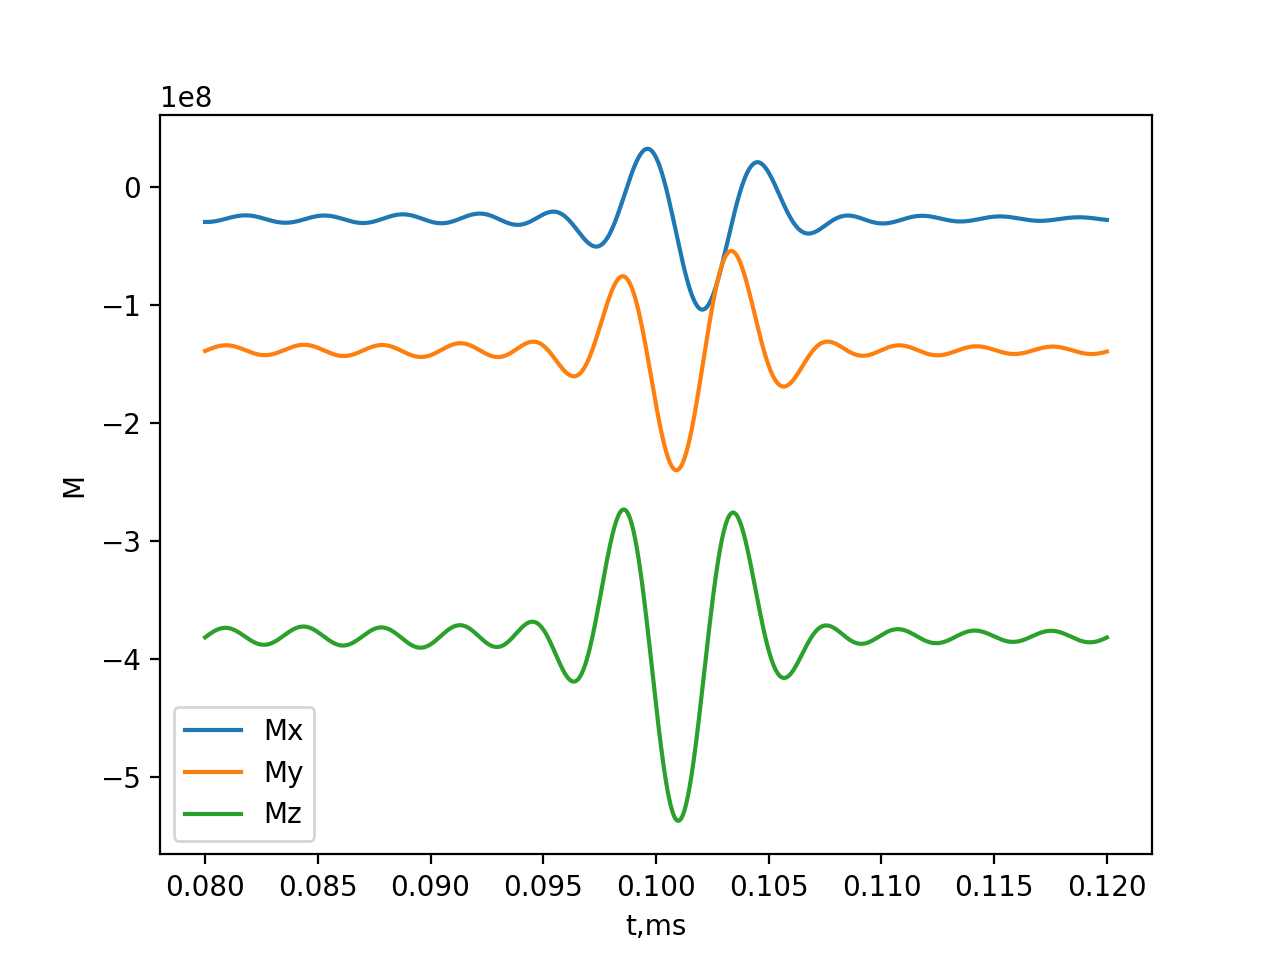

In [35]:
plt.figure()
plt.plot(t, Mx, label = 'Mx')
plt.plot(t, My, label = 'My')
plt.plot(t, Mz, label = 'Mz')
plt.ylabel("M")
plt.xlabel('t,ms')
plt.legend()

<IPython.core.display.Javascript object>


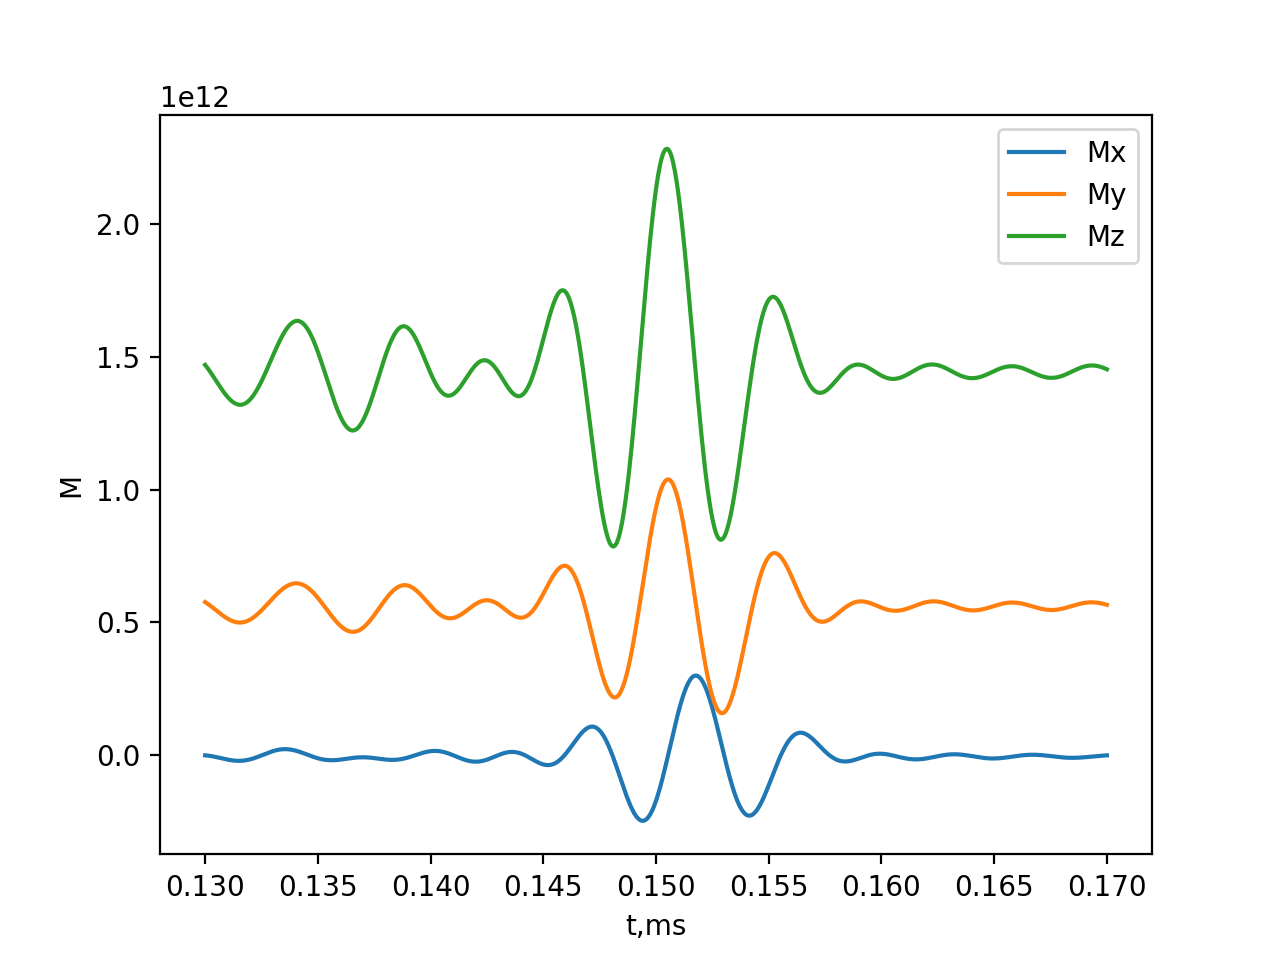

In [36]:
# sequence pi - Delay - pi/2 - tau - pi
N=1024
# Delay = np.linspace(20, 150, 10)
Delay = 50e-3

Mx=np.zeros(N)
My=np.zeros(N)
Mz=np.zeros(N)

Tstart= Delay + tau*2 - 20e-3
Tfinish=40e-3+Tstart
t=np.linspace(Tstart, Tfinish, N)

# pulse sequence
for k in range(50):
    d_omega1 = d_omega + ddomega1distrib[k]
    ditriK = np.exp(-ddomega1distrib[k]*ddomega1distrib[k]/2.0/d_omega/d_omega)

    #zero pulse pi
    eHm00Ze = Rz(2*tpulse, d_omega1)
    eHm00RF  = Rx(2*tpulse, omega1)
    ro00 = eHm00RF*eHm00Ze*ro0*eHm00Ze.conjugate()*eHm00RF.conjugate()

    #evolution after zero pulse
    eHm01Ze = Rz(Delay - 2*tpulse, d_omega1)
    ro01    = eHm01Ze*ro00*eHm01Ze.conjugate()

    # first pulse pi/2
    eHm1Ze = Rz(tpulse, d_omega1)
    eHm1RF  = Rx(tpulse, omega1)
    ro1 = eHm1RF*eHm1Ze*ro01*eHm1Ze.conjugate()*eHm1RF.conjugate()

    # evolution after first pulse
    eHm2Ze = Rz(tau - tpulse, d_omega1)
    ro2 = eHm2Ze*ro1*eHm2Ze.conjugate()

    # second pulse 
    eHm3Ze = Rz(2*tpulse, d_omega1)
    eHm3RF  = Rx(2*tpulse, omega1)
    ro3 = eHm3RF*eHm3Ze*ro2*eHm3Ze.conjugate()*eHm3RF.conjugate()

    # evolution after second pulse
    for i in range(N):
        eHm4Ze = Rz(t[i]- tpulse*2.0 - Delay - tau, d_omega1)
        ro = eHm4Ze*ro3*eHm4Ze.transpose().conjugate()

        MatX = ro*Sx
        MatY = ro*Sy
        MatZ = ro*Sz
        Mx[i]+= ((MatX).trace()).real*ditriK
        My[i]+= ((MatY).trace()).real*ditriK
        Mz[i]+= ((MatZ).trace()).real*ditriK

plt.figure()
plt.plot(t, Mx, label = 'Mx')
plt.plot(t, My, label = 'My')
plt.plot(t, Mz, label = 'Mz')
plt.ylabel("M")
plt.xlabel('t,ms')
plt.legend()